In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("encuesta2.csv")

In [5]:
df.head()

,Marca temporal,¿Cuál es tu país de residencia?,¿Realizas o realizaste búsquedas de propiedades por internet?,Señala cuáles consideras más importante en un anuncio:,¿Lees las descripciones de los anuncios?,¿Que cualidades en la descripción pueden hacerte pagar más o pagar menos por una propiedad? (Ejemplo: si menciona que la propiedad tiene un balcón)
0,17/11/2019 16:17:49,Mexico,Sí,"Metros Cuadrados, Ciudad, Zona, Antigüedad de ...",Si,Si está con todos los servicios funcionand
1,19/11/2019 1:17:14,Mexico,Sí,Metros Cuadrados,Si,La plusvalía del inmueble
2,19/11/2019 1:37:00,Mexico,No,"Metros Cuadrados, Zona, Antigüedad de la propi...",Si,Dependiendo sus cualidades
3,19/11/2019 2:10:23,Mexico,Sí,Metros Cuadrados,Si,"Los acabados, que se vean cuidados aunque no s..."
4,19/11/2019 21:36:23,Mexico,Sí,Zona,Si,"Ubicación, M2"


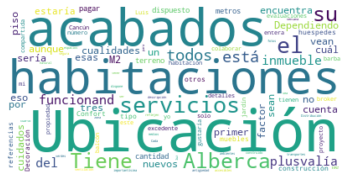

In [168]:
# Start with one review:
descripcion = df.iloc[:,5]

text = " ".join(review for review in descripcion)
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = ['los','de','La','que','Si','con','se','Las','en','una','más','es','soy'], background_color = "white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.title("Wordcloud de términos en respuesta de opinión", fontsize = 20)
plt.show()

wordcloud.to_file("word_cloud.png")

In [90]:
# Start with one review:
respuestas = df.iloc[:,3]
joined = " ".join(respuesta for respuesta in respuestas)

nombres=[]
valores=[]

nombres.append("Pileta / Gim / SUM")
nombres.append("Cant. de Baños")
nombres.append("Coordenadas")
nombres.append("Antigüedad")
nombres.append("Ciudad")
nombres.append("Cant. de Habitaciones")
nombres.append("Metros Cuadrados")
nombres.append("Zona")

valores.append(joined.count("Si cuenta con pileta")+ joined.count("Si cuenta con SUM") + \
               joined.count("Si cuenta con gimnasio"))
valores.append(joined.count("Cantidad de Baños"))
valores.append(joined.count("Sus coordenadas geográficas"))
valores.append(joined.count("Antigüedad de la propiedad"))
valores.append(joined.count("Ciudad"))
valores.append(joined.count("Cantidad de Habitaciones"))
valores.append(joined.count("Metros Cuadrados"))
valores.append(joined.count("Zona"))

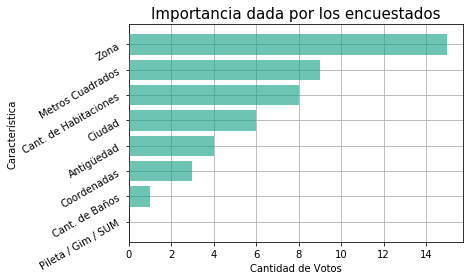

In [174]:
# Make fake dataset
height = valores
bars = nombres
y_pos = np.arange(len(bars))
 
plt.grid()
# Create horizontal bars
plt.barh(y_pos, height, zorder= 4, color = '#0C9E80', alpha = 0.6)
plt.yticks(y_pos, bars, rotation = 30)
# Create names on the y-axis
plt.title("Importancia dada por los encuestados", fontsize = 15)
plt.xlabel("Cantidad de Votos")
plt.ylabel("Característica")
plt.savefig("Choices.png", bbox_inches= 'tight')
plt.show()